# Biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán, và biểu đồ bong bóng

## Giới thiệu

Trong phần lab này, chúng ta tiếp tục khám phá thư viện Matplotlib. Cụ thể hơn, chúng ta sẽ học cách tạo biểu đồ tròn, biểu đồ hộp, biểu đồ phân tán, và biểu đồ bong bóng.

## Bảng nội dung

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Khám phá tập dữ liệu với *p*andas](#0)<br>
2. [Tải và chuẩn bị dữ liệu](#2)<br>
3. [Trực quan hóa dữ liệu bằng Matplotlib](#4) <br>
4. [Biểu đồ tròn](#6) <br>
5. [Biểu đồ hộp](#8) <br>
6. [Biểu đồ phân tán](#10) <br>
7. [Biểu đồ bong bóng](#12) <br> 
</div>
<hr>

# Khám phá tập dữ liệu với *pandas* và Matplotlib<a id="0"></a>

Công cụ: Khóa học phụ thuộc khá nhiều vào [*pandas*](http://pandas.pydata.org/) và [**Numpy**](http://www.numpy.org/) để sắp xếp, phân tích và trực quan hóa dữ liệu. Thư viện biểu đồ cơ bản mà chúng ta sẽ khám phá trong khóa học là [Matplotlib](http://matplotlib.org/).

Tập dữ liệu: Cuộc di cư đến Canada từ năm 1980 đến 2013 - [Luồng di cư quốc tế đến và đi từ các quốc gia được chọn - Bản sửa đổi năm 2015](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml) từ trang web của Liên hợp quốc.

Tập dữ liệu chứa dữ liệu hàng năm về dòng người di cư quốc tế được ghi lại bởi các quốc gia điểm đến. Dữ liệu thể hiện cả dòng di cư vào và ra theo nơi sinh, quốc tịch hoặc nơi cư trú trước đây / hay sau này đối với cả người nước ngoài và người trong nước. Trong bài lab này, chúng ta sẽ tập trung vào dữ liệu Nhập cư Canada.

*italicized text*# Tải và chuẩn bị dữ liệu <a id="2"></a>

*Nhập* các mô-đun cơ bản.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Hãy tải xuống và nhập tập dữ liệu Canadian Immigration chính của chúng ta bằng cách sử dụng phương thức *pandas* `read_excel()`. Thông thường, trước khi chúng ta có thể làm điều đó, chúng ta cần tải xuống một mô-đun mà *pandas* yêu cầu để đọc trong tệp excel. Mô-đun này là **xlrd**. Để thuận tiện, chúng tôi đã cài đặt sẵn mô-đun này, vì vậy bạn sẽ không phải lo lắng về điều đó. Nếu không, bạn sẽ cần chạy dòng code sau để cài đặt mô-đun **xlrd**:
```
!conda install -c anaconda xlrd --yes
```

*Tải* tập dữ liệu và đọc nó trong khung dữ liệu *pandas*.

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Hãy nhìn vào 5 item đầu tiên trong tập dữ liệu của chúng ta.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Hãy tìm ra có bao nhiêu mục nhập trong tập dữ liệu.

In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


Dọn dẹp dữ liệu. Chúng ta sẽ tạo một số thay đổi đối với tập dữ liệu gốc để dễ tạo các hình ảnh trực quan hơn. Tham khảo *Introduction to Matplotlib and Line Plots* và *Area Plots, Histograms, and Bar Plots* để biết thêm mô tả hi tiết về quá trình xử lý.

In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(5)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.select_dtypes(include=["int64"]).sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)




```
# This is formatted as code
```

# Trực quan hóa dữ liệu bằng Matplotlib<a id="4"></a>

Nhập `Matplotlib`.

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.2


**bold text**# Biểu đồ tròn <a id="6"></a>

`Biểu đồ tròn` là một đồ họa hình tròn hiển thị tỷ lệ số bằng cách chia hình tròn thành các lát theo tỷ lệ. Rất có thể bạn đã quen thuộc với biểu đồ hình tròn vì nó được sử dụng rộng rãi trong kinh doanh và truyền thông. Chúng ta có thể tạo biểu đồ hình tròn trong Matplotlib bằng cách truyền từ khóa `kind=pie`.

Hãy sử dụng biểu đồ hình tròn để tìm hiểu tỷ lệ (phần trăm) của những người nhập cư mới được nhóm theo các châu lục trong toàn bộ khoảng thời gian từ 1980 đến 2013.

Bước 1: Thu thập dữ liệu. 

Chúng ta sẽ sử dụng phuwong thức *pandas* `groupby` để tổng kết dữ liệu về di cư theo `Continent`. Quá trình chung của `groupby` bao gồm các bước sau:

1. **Split:** Tách dữ liệu ra thành các nhóm theo một vài tiêu chí.
2. **Apply:** Áp dụng độc lập một hàm vào mỗi nhóm:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Kết hợp các kết quả thành một cấu trúc dữ liệu.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">

In [8]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Northern AfricaMiddle AfricaWestern AfricaSout...,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Southern AsiaWestern AsiaWestern AsiaWestern A...,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Southern EuropeSouthern EuropeWestern EuropeEa...,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,CaribbeanSouth AmericaCaribbeanCaribbeanCentra...,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Northern AmericaNorthern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Bước 2: Trình bày dữ liệu bằng biểu đồ. Chúng ta sẽ truyền từ khóa `kind = 'pie'`, cùng với các tham số bổ sung sau:
- `autopct` -  là một xâu kí tự hay hàm dùng để dán nhãn các nêm (wedge) với giá trị số của chúng. Nhãn sẽ được đặt bên trong nêm. Nếu nó ở dạng xâu lí tự, nhãn sẽ là `fmt%pct`.
- `startangle` - xoay điểm khởi đầu của biểu đồ tròn theo độ góc ngược chiều kim đồng hồ so với trục x.
- `shadow` - Vẽ bóng dưới biểu đồ tròn (để tạo cảm giác 3D).

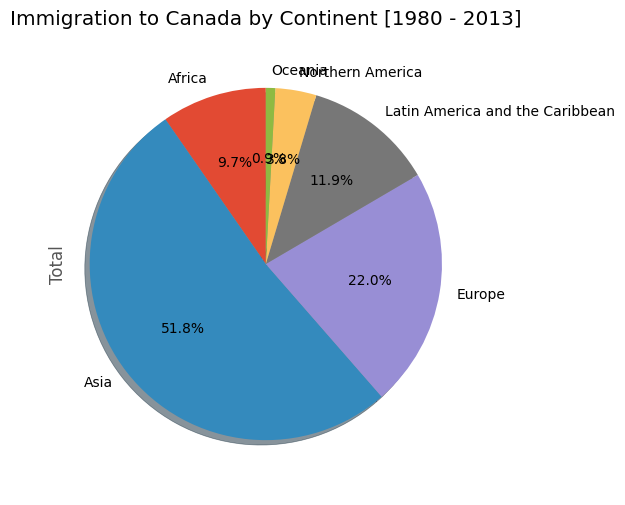

In [9]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()



```
# This is formatted as code
```

Hình ảnh trên không được rõ ràng lắm, trong một số trường hợp, các con số và văn bản trùng lặp. Hãy thực hiện một số sửa đổi để cải thiện hình ảnh:

* Loại bỏ các nhãn văn bản trên biểu đồ tròn bằng cách truyền vào `legend` và thêm một legend riêng biệt bằng cách sử dụng `plt.legend()`.
* Đẩy tỷ lệ phần trăm để nằm ngay bên ngoài biểu đồ hình tròn bằng cách chuyển vào tham số `pctdistance`.
* Truyền một tập hợp màu tùy chỉnh cho các lục địa bằng cách truyền vào tham số `colors`.
* **Khám phá** biểu đồ tròn để nhấn mạnh 3 lục địa với tỉ lệ nhỏ nhất (Châu Phi, Bắc Mĩ, Mỹ La Tinh và vùng Ca-ri-bê) bằng cách truyền vào tham số `explode`.


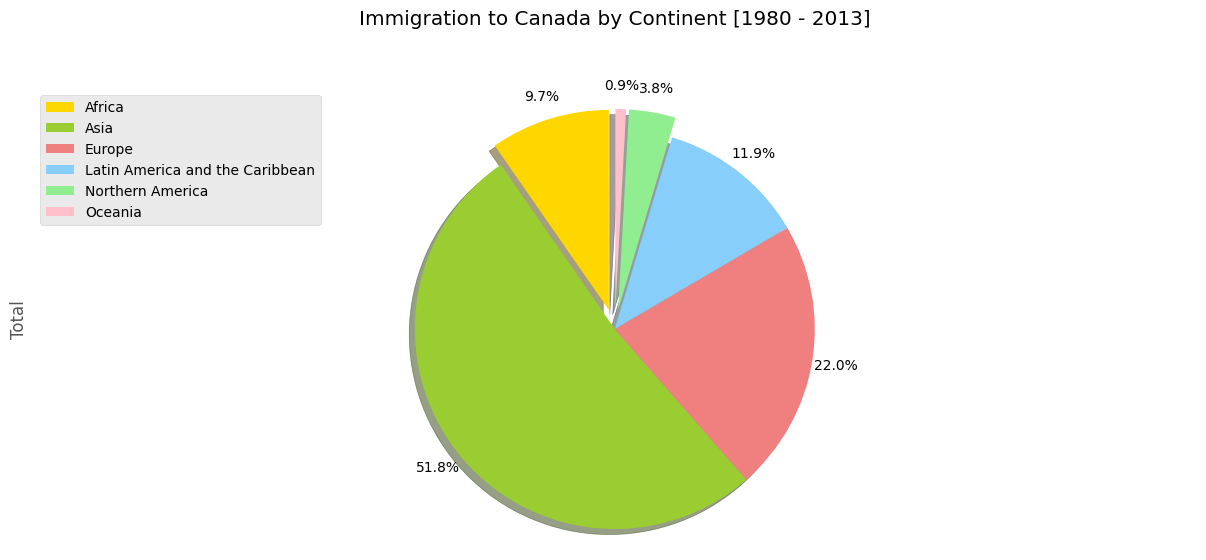

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Câu hỏi:** Sử dụng biểu đồ tròn, hãy khám phá tỉ lệ (phần trăm) của những người di cư mới được nhóm theo lục địa vào năm 2013.

**Lưu ý**: Bạn có thể cần thử với các giá trị khám phá để sửa bất kỳ giá trị lát chồng chéo nào.

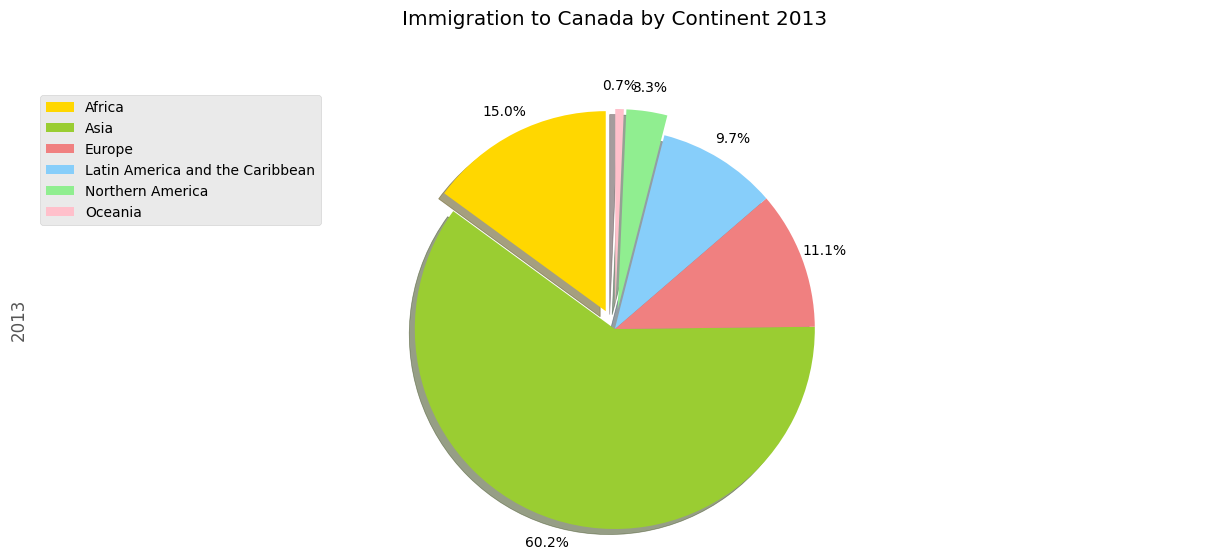

In [11]:
### type your answer here

df_continents2013 = df_continents['2013']

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents2013.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Nhấn đúp** __vào đây__ để xem đáp án.
<!-- The correct answer is:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2] # ratio for each continent with which to offset each wedge.
-->

<!--
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                            )
-->

<!--
\\ # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 
-->

<!--
\\ # add legend
plt.legend(labels=df_continents.index, loc='upper left') 
-->

<!--
\\ # show plot
plt.show()
-->

# Biểu đồ hộp <a id="8"></a>

`Biểu đồ hộp` là cách biểu diễn về mặt thống kê về *sự phân bố* dữ liệu thông qua 5 chiều: 

- **Minimun:** Số nhỏ nhất trong tập dữ liệu.
- **First quartile:** số nằm giữa `minimum` và `median`.
- **Second quartile (Median):** số nằm giữa tập dữ liệu (đã được sắp xếp).
- **Third quartile:** số nằm giữa `median` và `maximum`.
- **Maximum:** số lớn nhất trong tập dữ liệu.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

Để tạo `box plot`, chúng ta có thể sử dụng `kind=box` trong phương thức `plot` được gọi trên *pandas* series hoặc dataframe.

Hãy vẽ biểu đồ hộp cho những người nhập cư Nhật Bản trong giai đoạn 1980-2013.

Bước 1: Lấy tập dữ liệu. Mặc dù chúng ta chỉ trích xuất dữ liệu cho một quốc gia, nhưng chúng ta vẫn lấy dữ liệu đó dưới dạng dataframe. Điều này sẽ giúp chúng ta gọi phương thức `dataframe.describe()` để xem các percentile.

In [12]:
# để có được dataframe, hãy cho 'Japan' vào trong dấu ngoặc vuông.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Bước 2: Vẽ biểu đồ bằng cách truyền vào `kind='box'`.

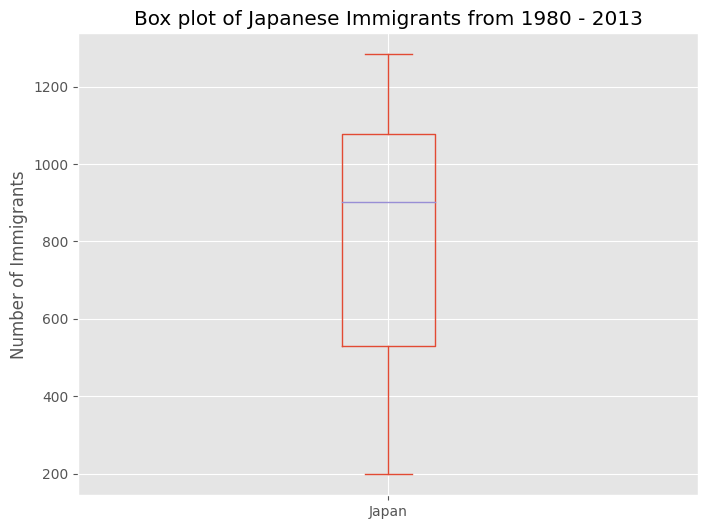

In [13]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Ngay lập tức, chúng ta có thể đưa ra một vài nhận xét chính từ biểu đồ trên:
1. Số lượng người nhập cư tối thiểu là khoảng 200 (min), số tối đa là khoảng 1300 (max) và trung bình là khoảng 900 (median).
2. 25% các năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm ~500 hoặc ít hơn (Phần tư thứ nhất).
2. 75% các năm trong giai đoạn 1980 - 2013 có số lượng người nhập cư hàng năm ~1100 người trở xuống (Phần tư thứ ba).

Chúng ta có thể xem các con số thực tế bằng cách gọi phương thức `describe()` trên dataframe.

In [14]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Một trong những lợi ích chính của biểu đồ hộp là có thể so sánh phân phối của nhiều tập dữ liệu. Ở một trong các lab trước đây, chúng ta đã thấy Trung Quốc và Ấn Độ có xu hướng nhập cư rất giống nhau. Hãy phân tích thêm hai quốc gia này bằng cách sử dụng biểu đồ hộp.

**Câu hỏi:** So sánh sự phân bố số lượng người nhập cư mới từ Ấn Độ và Trung Quốc trong giai đoạn 1980-2013.

Bước 1: Lấy tập dữ liệu cho Trung Quốc và Ấn Độ và dataframe **df_CI**.

In [15]:
### type your answer here

df_CI = df_can.loc[['China', 'India'], years].transpose()

df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()
-->

Hãy xem tỷ lệ phần trăm được liên kết với cả hai quốc gia bằng phương thức `describe()`.

In [16]:
### type your answer here

df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
df_CI.describe()
-->

Bước 2: Vẽ biểu đồ

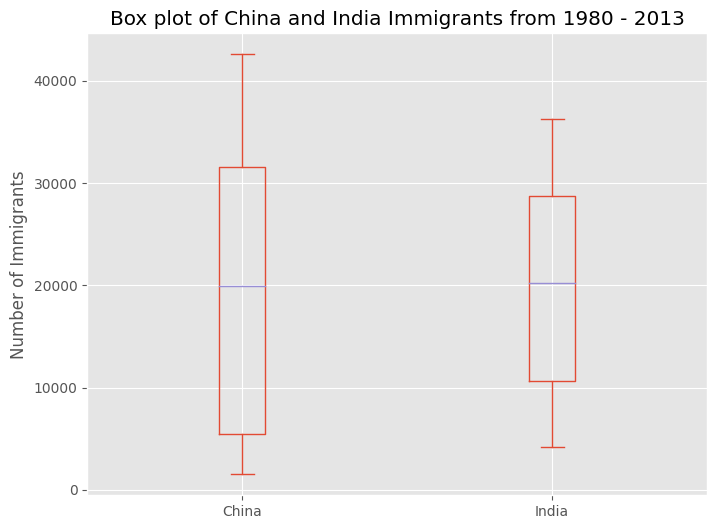

In [17]:
### type your answer here

df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
df_CI.plot(kind='box', figsize=(10, 7))
-->

<!--
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
-->

<!--
plt.show()
-->

Chúng ta có thể thấy rằng, mặc dù cả hai quốc gia đều có cùng dân số nhập cư trung bình (~20,000 người), nhưng phạm vi dân số nhập cư của Trung Quốc lại trải rộng hơn so với Ấn Độ. Dân số tối đa của Ấn Độ trong bất kỳ năm nào (36,210) đều thấp hơn khoảng 15% so với dân số tối đa từ Trung Quốc (42,584).


Nếu muốn tạo các đồ thị hộp ngang, bạn có thể truyền tham số `vert` trong hàm **plot**  và gán *False* cho nó. Bạn cũng có thể chỉ định một màu khác trong trường hợp bạn không muốn màu đỏ mặc định.

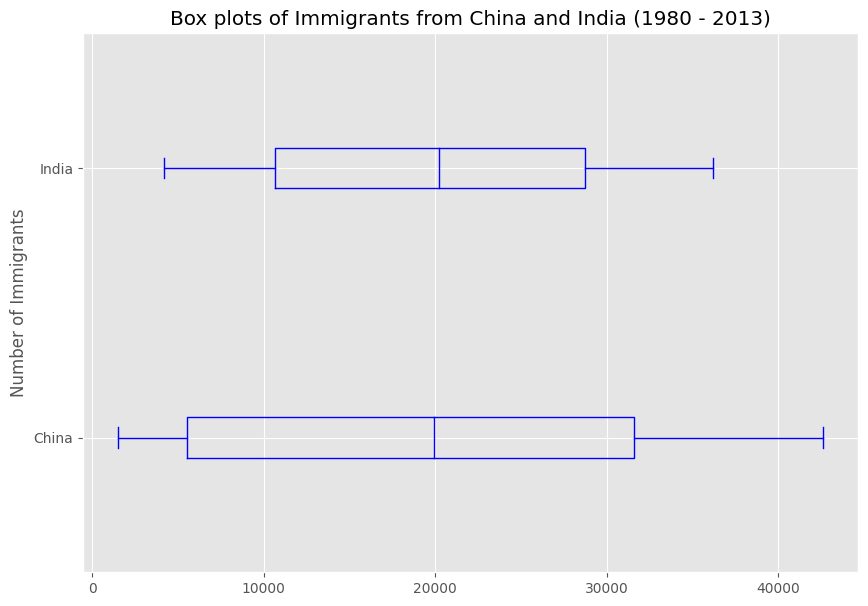

In [18]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

**Subplot**

Thông thường, chúng ta muốn vẽ nhiều biểu đồ trong cùng một hình. Ví dụ: chúng ta có thể thực hiện so sánh song song giữa biểu đồ hộp với biểu đồ đường di cư của Trung Quốc và Ấn Độ.

Để hiển thị nhiều biểu đồ với nhau, chúng ta có thể tạo một **`figure`** (canvas tổng thể) và chia nó thành các **`subplot`**, mỗi subplot chứa một biểu đồ. Với các **`subplot`**, chúng ta thường làm việc với **artist layer** thay vì **scripting layer**.

Cú pháp điển hình như sau: <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Trong đó:
- `nrows` và `ncols` được sử dụng để chia tách figure theo ý muốn thành các trục phụ (`nrows` \* `ncols`),
- `plot_number` được sử dụng để xác định subplot cụ thể mà hàm này tạo ra trong notional grid. `plot_number` bắt đầu từ 1, tăng dần trên các hàng trước tiên và có max là `nrows` * `ncols` như hình dưới đây.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

Sau đó, chúng ta có thể chỉ định subplot nào để đặt mỗi biểu đồ bằng cách truyền vào tham số `ax` trong phương thức `plot()` như sau:

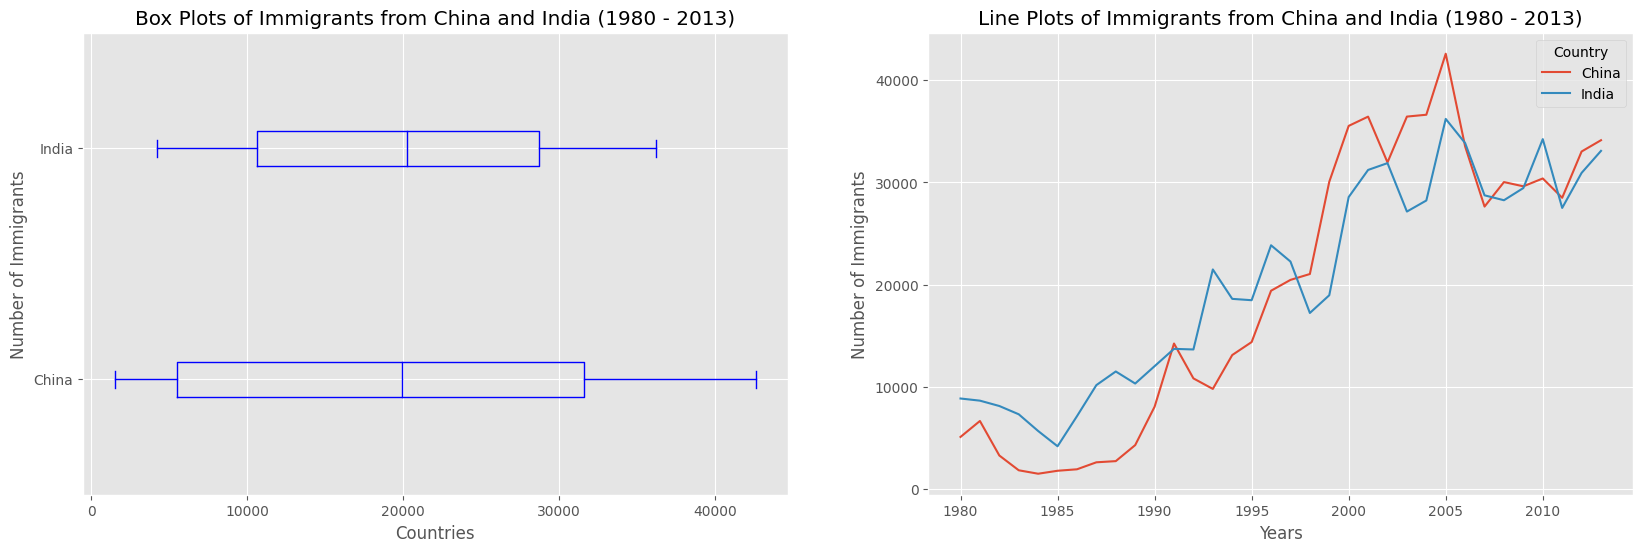

In [19]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_ylabel('Number of Immigrants')
ax0.set_xlabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Mẹo về quy ước subplot**

Trong trường hợp khi `nrows`, `ncols` và `plot_number` đều nhỏ hơn 10, thì tồn tại một sự tiện lợi là có thể đưa ra 3 chữ số thay thế, trong đó hàng trăm đại diện cho `nrows`, hàng chục đại diện cho `ncols` và các đơn vị đại diện cho `plot_number`. Ví dụ:
```python
   subplot(211) == subplot(2, 1, 1) 
```
tạo ra một trục phụ trong figure đại diện cho biểu đồ trên cùng (tức là biểu đồ đầu tiên) trong notional grid 2 hàng x 1 cột (thực tế không tồn tại lưới nào, nhưng về mặt khái niệm thì đây là cách subplot trả về được định vị).

Hãy thử cái gì đó cao cấp hơn một chút.

Trước đó, chúng ta đã xác định 15 quốc gia hàng đầu dựa trên tổng số người nhập cư từ năm 1980-2013.

**Câu hỏi:** Tạo một biểu đồ hộp để hình dung sự phân bố của 15 quốc gia hàng đầu (dựa trên tổng số người nhập cư) được nhóm theo các *thập kỷ* `1980s`, `1990s` và `2000s`.

Bước 1: Lấy tập dữ liệu. Nhận 15 quốc gia hàng đầu dựa trên Tổng số người nhập cư. Đặt tên cho dataframe là **df_top15**.

In [20]:
### type your answer here

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 15 entries
df_top15 = df_can.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15
-->

Bước 2: Tạo dataframe mới chứa tổng hợp cho mỗi thập kỷ. Cách để làm điều đó:
   1. Tạo list tất cả các năm trong các thập kỷ 80, 90 và 00.
   2. Cắt dataframe df_can ban đầu để tạo series cho mỗi thập kỷ và tổng hợp trong tất cả các năm cho mỗi quốc gia.
   3. Hợp nhất ba series thành dataframe mới. Gọi dataframe của bạn là **new_df**.

In [21]:
### type your answer here

years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
\\ # create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 
-->

<!--
\\ # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)
-->

<!--
\\ # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 
-->

<!--
\\ # display dataframe
new_df.head()
-->

Hãy tìm hiểu thêm về các thống kê được liên kết với dataframe bằng phương thức `describe()`.

In [22]:
### type your answer here

new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
new_df.describe()
-->

Bước 3: Vẽ biểu đồ hộp.

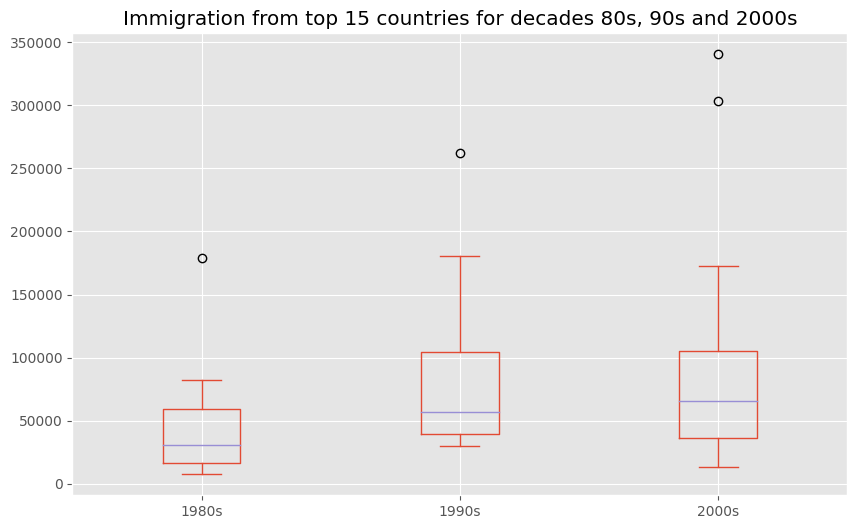

In [23]:
### type your answer here

new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Nhấp đúp  __vào đây__ để xem lời giải.
<!-- The correct answer is:
new_df.plot(kind='box', figsize=(10, 6))
-->

<!--
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
-->

<!--
plt.show()
-->

Lưu ý: biểu đồ hộp khác với bảng tóm tắt đã tạo. Biểu đồ hộp quét dữ liệu và xác định các outlier (ngoại lai). Để trở thành outlier, giá trị dữ liệu phải:<br>
* lớn hơn Q3 ít nhất 1.5 lần IQR hoặc,
* nhỏ hơn Q1 ít nhất 1.5 lần IQR.

Hãy coi thập kỷ 2000 làm ví dụ: <br>
* Q1 (25%) = 36,101.5 <br>
* Q3 (75%) = 105,505.5 <br>
* IQR = Q3 - Q1 = 69,404 <br>

Theo định nghĩa của outlier, bất kỳ giá trị nào lớn hơn Q3 x 1.5 lần IQR sẽ được gắn cờ là outlier.

Outlier > 105,505.5 + (1.5 * 69,404) <br>
Outlier > 209,611.5

In [24]:
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


Trung Quốc và Ấn Độ đều được coi là outlier vì dân số của họ trong thập kỷ vượt quá 209,611.5.

Biểu đồ hộp là một công cụ trực quan hóa nâng cao, có nhiều tùy chọn và tùy chỉnh vượt quá phạm vi của lab này. Vui lòng tham khảo [tài liệu Matplotlib](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) về biểu đồ hộp để biết thêm thông tin.

# Biểu đồ phân tán <a id="10"></a>

`Biểu đồ phân tán` (2D) là một phương thức hữu dụng để so sánh các giá trị với nhau. Biểu đồ `phân tán` trông tương tự `biểu đồ đường` ở chỗ chúng đều ánh xạ các biến độc lập và phụ thuộc trên đồ thị 2D. Trong khi các điểm dữ liệu được kết nối với nhau bằng một đường trong biểu đồ đường, chúng không được kết nối trong biểu đồ phân tán. Dữ liệu trong biểu đồ phân tán được coi là thể hiện một xu hướng. Với phân tích sâu hơn bằng cách sử dụng các công cụ như hồi quy, chúng ta có thể tính toán toán học mối quan hệ này và sử dụng nó để dự đoán các xu hướng bên ngoài tập dữ liệu.

Hãy bắt đầu bằng cách khám phá các nội dung sau:

Sử dụng `biểu đồ phân tán`, hãy trực quan hóa xu hướng di cư đến Canada (bao gồm tất cả các quốc gia) trong những năm 1980 - 2013.

Bước 1: Lấy tập dữ liệu. Bởi vì chúng ta đang kì vọng sử dụng mối quan hệ giữa `years` và `total population`, chúng ta sẽ chuyển đổi từ kiểu `years` sang `int`.

In [25]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Bước 2: Trình bày dữ liệu bằng biểu đồ. Trong `Matplotlib`, chúng ta có thể tạo một biểu đồ `phân tán` bằng cách truyền `kind='scatter'` làm đối số biểu đồ. Chúng ta cũng sẽ cần truyền từ khóa `x` và `y` để chỉ định các cột sẽ là trục x và y.

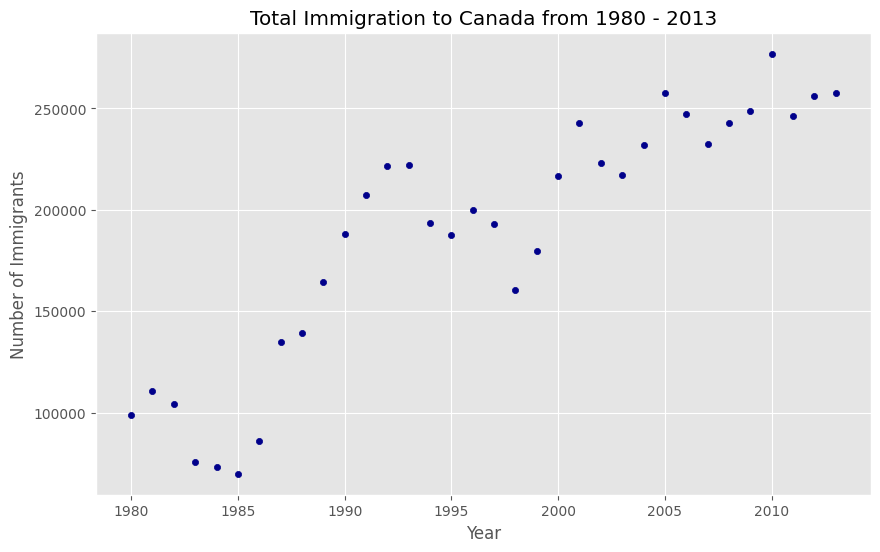

In [26]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

*Lưu ý* làm thế nào để biểu đồ phân tán không kết nối các điểm dữ liệu với nhau. Chúng ta có thể quan sát rõ ràng có một xu hướng tăng trong dữ liệu: khi một năm trôi qua, tổng số người nhập cư tăng lên. Chúng ta có thể phân tích toán học xu hướng tăng này bằng cách sử dụng đường hồi quy (đường phù hợp nhất).

Hãy thử vẽ đường tuyến tính phù hợp nhất, và sử dụng để dự đoán số lượng người di cư vào năm 2015.

Bước 1: Lấy phương trình của dòng phù hợp nhất. Chúng ta sẽ sử dụng phương thức `polyfit()` **Numpy** bằng cách truyền vào như sau:
- `x`: tọa độ x của dữ liệu.. 
- `y`: tọa độ y của dữ liệu.. 
- `deg`: Bậc của đa thức chỉnh hợp. 1 = tuyến tính, 2 = bậc hai, v.v.

In [27]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

Output là một mảng có hệ số đa thức, lũy thừa cao nhất trước. Vì chúng ta đang vẽ một hồi quy tuyến tính `y= a*x + b`, output của chúng ta có 2 phần tử `[5.56709228e+03, -1.09261952e+07]` với hệ số góc ở vị trí 0 và giao điểm ở vị trí 1.

Bước 2: Vẽ đường hồi quy trên `biểu đồ phân tán`.

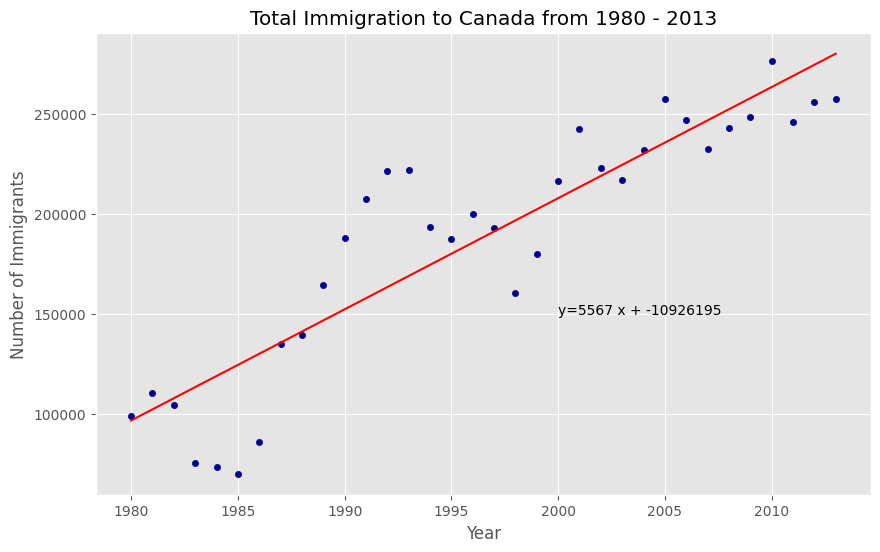

'No. Immigrants = 5567 * Year + -10926195'

In [28]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Sử dụng phương trình đường phù hợp nhất, chúng ta có thể ước tính số lượng người nhập cư vào năm 2015:
```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```
Khi so sánh với thực tế từ Bộ Quốc tịch và Nhập cư Canada (CIC) [Báo cáo thường niên năm 2016](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp), chúng ta thấy rằng Canada đã nhận 271.845 người nhập cư vào năm 2015. Giá trị ước tính của chúng ta là 291.310 chỉ nằm trong khoảng 7% so với con số thực tế, vẫn khá tốt khi xem xét dữ liệu ban đầu của chúng ta từ Liên hợp quốc (và có thể khác một chút so với dữ liệu CIC).

Lưu ý thêm, chúng ta có thể quan sát thấy nhập cư đã giảm trong khoảng năm 1993 - 1997. Phân tích sâu hơn về chủ đề này cho thấy rằng vào năm 1993, Canada đã đưa vào thực tiễn Dự luật C-86 của Canada thành công, đưa ra các sửa đổi đối với hệ thống xác định người tị nạn, hầu hết là hạn chế. Những sửa đổi bổ sung đối với Quy định Nhập cư đã hủy bỏ quyền bảo trợ cần thiết cho "người thân được trợ giúp" và giảm số điểm được trao cho họ, khiến các thành viên gia đình (ngoài gia đình hạt nhân) khó nhập cư vào Canada hơn. Những biện pháp hạn chế này đã có tác động trực tiếp đến số lượng nhập cư trong vài năm tới.

**Câu hỏi**: Tạo một biểu đồ phân tán về tổng lượng di cư từ Đan Mạch, Na Uy, và Thụy Điển vào Canada từ năm 1980 đến năm 2013?

Bước 1: Thu thập dữ liệu:
   1. Tạo khung dữ liệu chỉ bao gồm các số được liên kết với Đan Mạch, Na Uy và Thụy Điển. Gọi nó là **df_countries**.
   2. Tính tổng số lượng di cư hàng năm ở 3 quốc gia và chuyển kết quả thành một khung dữ liệu. Đặt tên khung dữ liệu mới là **df_total**.
   3. Cài đặt lại chỉ số ở các địa điểm.
   4. Đặt tên lại các cột thành **year** và **total**.
   5. Hiển thị khung dữ liệu kết quả.

In [29]:
### type your answer here

df_countries = df_can.loc[['Denmark', 'Norway', 'Switzerland'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,1194
1,1981,1181
2,1982,1039
3,1983,527
4,1984,450


Nhấn đúp __vào đây__ để xem giải pháp.
<!-- The correct answer is:
\\ # create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
-->

<!--
\\ # create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
-->

<!--
\\ # reset index in place
df_total.reset_index(inplace=True)
-->

<!--
\\ # rename columns
df_total.columns = ['year', 'total']
-->

<!--
\\ # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
-->

<!--
\\ # show resulting dataframe
df_total.head()
-->

Bước 2: Tạo biểu đồ phân tán bằng cách vẽ total vs year trong **df_total**.

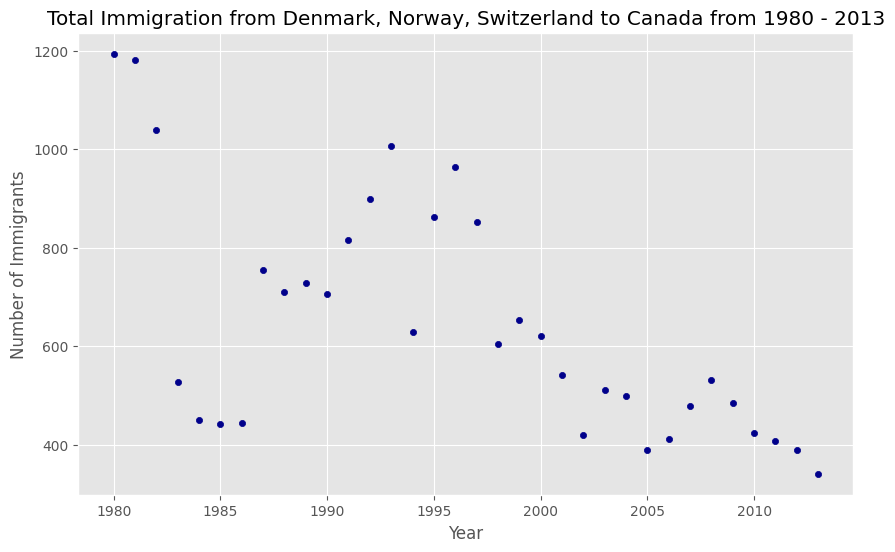

In [30]:
### type your answer here

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration from Denmark, Norway, Switzerland to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Nhấn đúp __vào đây__ để xem giải pháp.
<!-- The correct answer is:
\\ # generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
-->

<!--
\\ # add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
-->

<!--
\\ # show plot
plt.show()
-->

# Biểu đồ bong bóng <a id="12"></a>

`Biểu đồ bong bóng` là một biến thể của `biểu đồ phân tán` hiển thị 3 chiều của dữ liệu (x, y, z). Các điểm dữ liệu được thay thế bởi các bong bóng, và kích thước bong bóng được quyết định bởi biến thứ 3 'z', hay còn gọi là trọng số. Trong `maplotlib`, chúng ta có thể truyền vào một mảng hoặc scalar cho từ khóa `s` cho `plot()`, chứa trọng số của mỗi điểm.

**Hãy bắt đầu bằng việc phân tích ảnh hưởng của cuộc đại suy thoái ở Argentina **.

Argentina đã trải qua một cuộc khủng hoảng lớn từ năm 1998 - 2002, gây ra tình trạng thất nghiệp lan rộng, bạo loạn, sự sụp đổ của chính phủ và vỡ nợ từ nước ngoài. Về thu nhập, hơn 50% người dân Argentina là người nghèo, và cứ 10 trẻ em Argentina thì có bảy trẻ em nghèo ở đỉnh điểm cuộc khủng hoảng năm 2002.

Hãy phân tích ảnh hưởng của cuộc khủng hoảng này, và so sánh tình trạng di dân ở Argentina so với hàng xóm Brazil. Thực hiện điều đó bằng cách dùng `biểu đồ Chúng ta sẽ đặt trọng số cho bong bóng dưới dạng giá trị *normalized* của dân số hàng năm.

Bước 1: Thu thập dữ liệu của Brazil và Argentina. Giống như trong ví dụ trước, chúng ta sẽ chuyển đổi `Years` thành kiểu int và đưa nó vào khung dữ liệu.

In [31]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


Bước 2: Tạo các trọng số đã được chuẩn hóa. 

Có một vài phương thức chuẩn hóa trong thống kê, mỗi phương thức có công dụng riêng. Trong trường hợp này, chúng ta sẽ sử dụng [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) để đưa tất cả các giá trị vào khoảng [0,1]. Công thức chung là:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

trong đó *`X`* là giá trị ban đầu, *`X'`* là giá trị đã chuẩn hóa. Công thức đặt giá trị lớn nhất ở tập dữ liệu là 1, và đặt giá trị nhỏ nhất là 0. Các điểm dữ liệu còn lại thì nằm trong khoảng từ 0-1.


In [32]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Bước 3: Trình bày dữ liệu bằng biểu đồ. 
- Để vẽ 2 biểu đồ phân tán khác nhau trong một biểu đồ, chúng ta có thể đưa các trục của một biểu đồ vào biểu đồ khác bằng cách truyền vào thông qua tham số `ax`. 
- Chúng ta cũng sẽ truyền vào các trọng số bằng các tham số `s`. Giả sử các trọng số được chuẩn hóa nằm trong khoảng 0-1, chúng sẽ không thể nhìn thấy được trên biểu đồ. Do đó, chúng ta sẽ:
    - nhân các trọng số với 2000 để có thể hiển thị trên biểu đồ và,
    - thêm 10 vào mỗi giá trị nhỏ nhất (có trọng số 0 nên có thể nhân với 2000).

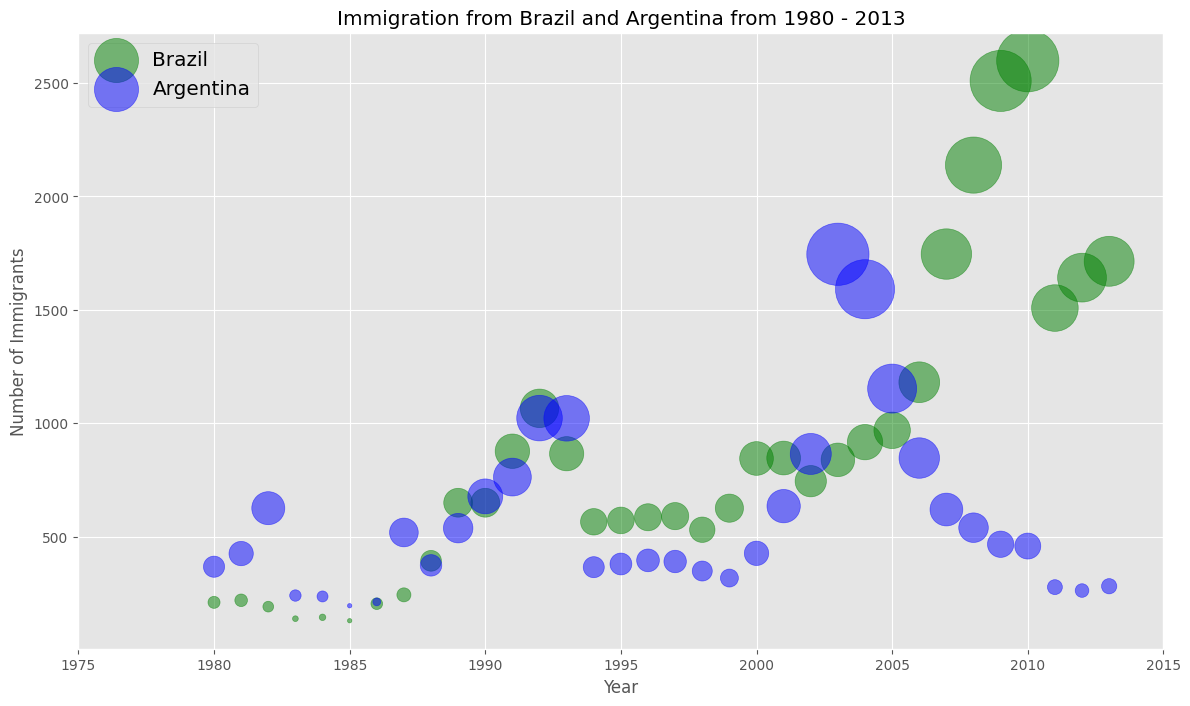

In [33]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

Kích thước của bong bóng tương ứng với mức độ dân số nhập cư trong năm đó, so với dữ liệu 1980-2013. Bong bóng càng lớn, số lượng người nhập cư năm đó càng nhiều.

Từ biểu đồ trên, chúng ta có thể thấy lượng nhập cư từ Argentina gia tăng tương ứng trong cuộc đại suy thoái 1998 - 2002. Chúng ta cũng có thể quan sát thấy một đợt tăng đột biến tương tự vào khoảng năm 1985 đến 1993. Trên thực tế, Argentina đã phải trải qua một cuộc đại suy thoái từ năm 1974 - 1990, ngay trước khi bắt đầu cuộc đại suy thoái 1998 - 2002.

Tương tự, Brazil đã phải chịu đựng * Hiệu ứng Samba * khi đồng real Brazil (tiền tệ) giảm gần 35% vào năm 1999. Người ta lo ngại về một cuộc khủng hoảng tài chính Nam Mỹ vì nhiều nước Nam Mỹ phụ thuộc nhiều vào xuất khẩu công nghiệp từ Brazil. Chính phủ Brazil sau đó đã thông qua một chương trình thắt lưng buộc bụng và nền kinh tế dần phục hồi trong những năm qua, đỉnh điểm là sự tăng vọt vào năm 2010. Dữ liệu nhập cư phản ánh những sự kiện này.

**Câu hỏi**: Ở phần trước của bài lab này, chúng ta đã tạo biểu đồ hộp để so sánh việc di dân từ Trung Quốc và Ấn Độ sang Canada. Tạo một biểu đồ bong bóng về việc di dân từ Trung Quốc và Ấn Độ để trực quan hóa sự khác nhau trong thời điểm từ 1980 đến 2013. Bạn có thể sử dụng **df_can_t** mà chúng ta đã xác định và sử dụng trong ví dụ trước.

Bước 1: Chuẩn hóa các dữ liệu của Trung Quốc và Ấn Độ.

In [34]:
### type your answer here

# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Nhấn đúp __vào đây__ để xem giải pháp.
<!-- The correct answer is:
\\ # normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
-->

<!--
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
-->

Bước 2: Tạo biểu đồ bong bóng.

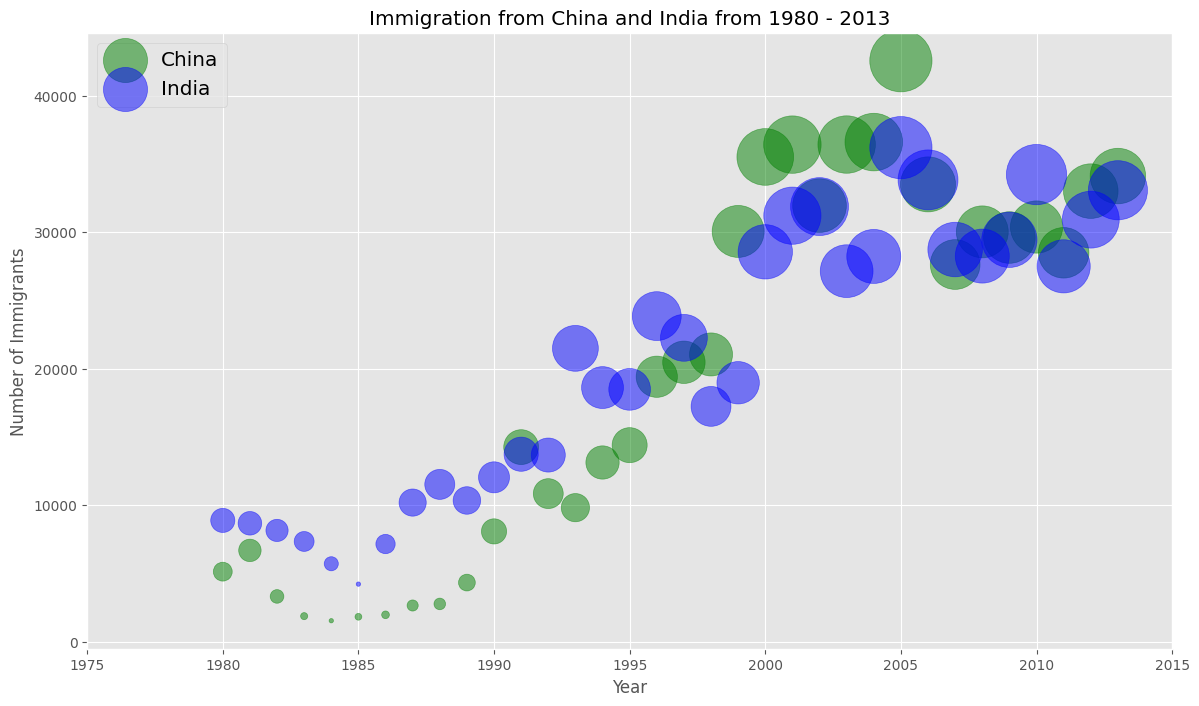

In [35]:
### type your answer here

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


Nhấn đúp __vào đây__ để xem giải pháp.
<!-- The correct answer is:
\\ # China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
-->

<!--
\\ # India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )
-->

<!--
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')
-->